<a href="https://colab.research.google.com/github/Soham20030/Student_Performance_Predictor-/blob/main/Student_Performance_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#loading the dataset
df = pd.read_csv('/content/Student_Performance.csv')

In [ ]:
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.shape


(10000, 6)

In [ ]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
y = df['Performance Index']

In [ ]:
x = df.drop(['Performance Index'], axis= 1)

In [ ]:
x


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [ ]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

#Data Preprocessing


In [ ]:
x['Extracurricular Activities'] = x['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [ ]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
columns = x.columns

In [ ]:
columns


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
x = scaler.fit_transform(x)

In [ ]:
x

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394]])

In [ ]:
x =pd.DataFrame(x, columns=columns)

In [ ]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982
9996,0.775188,-0.314013,1.010455,0.866505,0.145333
9997,0.388965,0.781575,1.010455,0.866505,0.145333
9998,1.547633,1.588851,1.010455,0.276805,-1.598526


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
252,-0.769703,0.550925,1.010455,0.276805,0.145333
6593,-0.383481,0.550925,1.010455,-1.492294,-0.203439
6194,1.161410,-0.314013,1.010455,-0.902594,0.494105
2363,0.388965,0.493263,1.010455,0.866505,-0.203439
7804,0.002742,-0.948301,-0.989654,1.456205,-0.900982
...,...,...,...,...,...
2272,1.161410,0.320275,-0.989654,-0.312895,0.494105
7910,-0.769703,-1.697914,1.010455,-0.902594,-0.900982
7181,-1.155926,0.262612,-0.989654,-0.902594,-1.598526
2374,-0.383481,0.954563,-0.989654,0.276805,-1.598526


In [ ]:
y_train

252     60.0
6593    58.0
6194    58.0
2363    68.0
7804    43.0
        ... 
2272    69.0
7910    18.0
7181    51.0
2374    68.0
4498    66.0
Name: Performance Index, Length: 8000, dtype: float64

In [ ]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9687,-0.769703,0.435600,1.010455,-0.312895,0.842877
7316,0.775188,1.012225,-0.989654,-0.902594,-0.203439
513,1.547633,1.012225,-0.989654,0.866505,1.540420
5313,1.547633,0.493263,1.010455,0.276805,0.494105
7238,0.388965,-0.544663,1.010455,0.276805,0.494105
...,...,...,...,...,...
2728,-1.542149,0.147287,1.010455,-0.902594,1.540420
1791,-0.769703,0.147287,-0.989654,-1.492294,-0.552210
4143,1.547633,1.185213,-0.989654,1.456205,-1.249754
6648,0.388965,-0.659988,-0.989654,0.276805,-0.203439


In [ ]:
y_test

9687    58.0
7316    78.0
513     89.0
5313    76.0
7238    45.0
        ... 
2728    45.0
1791    53.0
4143    87.0
6648    45.0
6164    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(x_test)

In [ ]:
predictions

array([57.78614398, 77.66201775, 85.79604678, ..., 87.74097305,
       46.26530527, 48.68313421])

In [ ]:
mse_test = mean_squared_error(y_test, predictions)

In [ ]:
mse_test

4.184191544140023

In [ ]:
predictions_train = lr.predict(x_train)

In [ ]:
predictions_train

array([59.90518074, 61.11211958, 58.12195499, ..., 49.39473243,
       68.26564723, 66.86972933])

In [ ]:
predictions_train.shape

(8000,)

In [ ]:
mse_train = mean_squared_error(y_train, predictions_train)

In [ ]:
mse_train

4.144048462953022

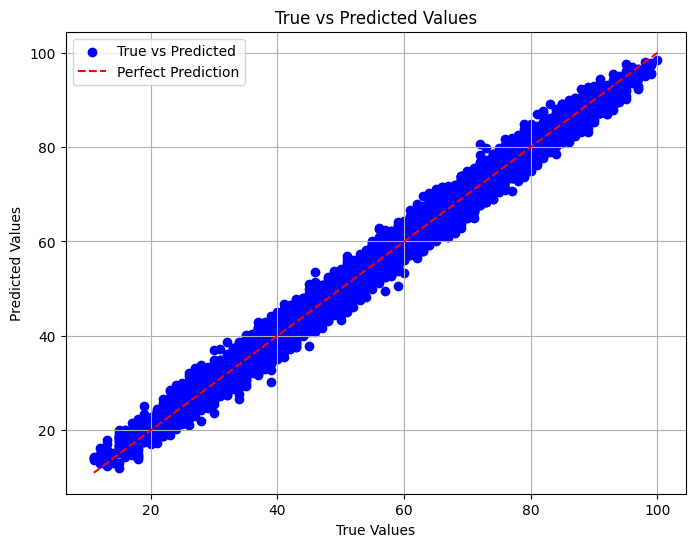

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, c='blue', label='True vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

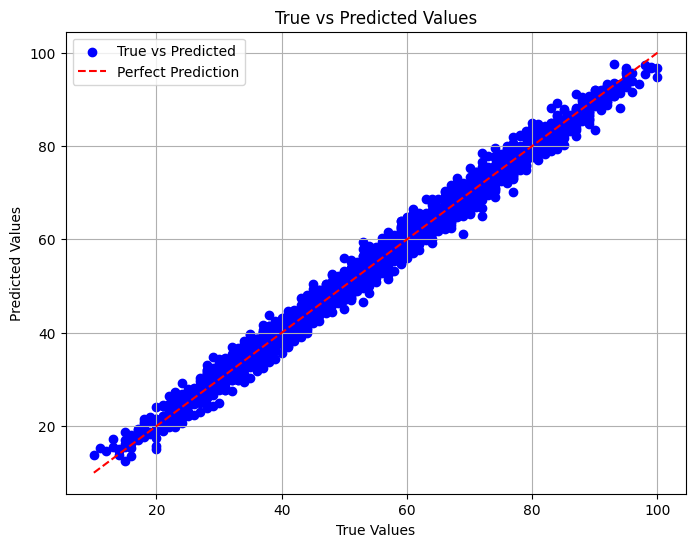

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='True vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
new_input = [[6,70,0,12,5]]

In [ ]:
new_input = scaler.transform(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_input

array([[ 0.38896495,  0.03196234, -0.98965352,  3.22530391,  0.1453332 ]])

In [ ]:
new_input.shape

(1, 5)

In [ ]:
predictions_new = lr.predict(new_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predictions_new

array([61.08044725])